In [1]:
import pandas as pd

# Load data
data = pd.read_csv('survey_data.csv')
print(data.head())


  ParticipantID  Pre_Awareness_of_self  Pre_perceived_Choice  \
0         Linda                    2.0                   2.4   
1         Maria                    2.4                   3.6   
2           Duy                    4.0                   3.8   
3         Irem                     2.8                   2.2   
4         Simon                    3.8                   4.0   

   Post_Awareness_of_self  Post_perceived_Choice  Extraversion  Agreeableness  \
0                     3.8                    4.0          2.00           2.67   
1                     2.6                    4.0          3.33           4.33   
2                     3.8                    4.0          3.67           3.33   
3                     2.8                    2.0          1.67           3.33   
4                     4.6                    4.2          3.00           3.00   

   Conscientiousness  Negative Emotionality  Open-Mindedness  
0               3.33                   3.00             4.67  
1 

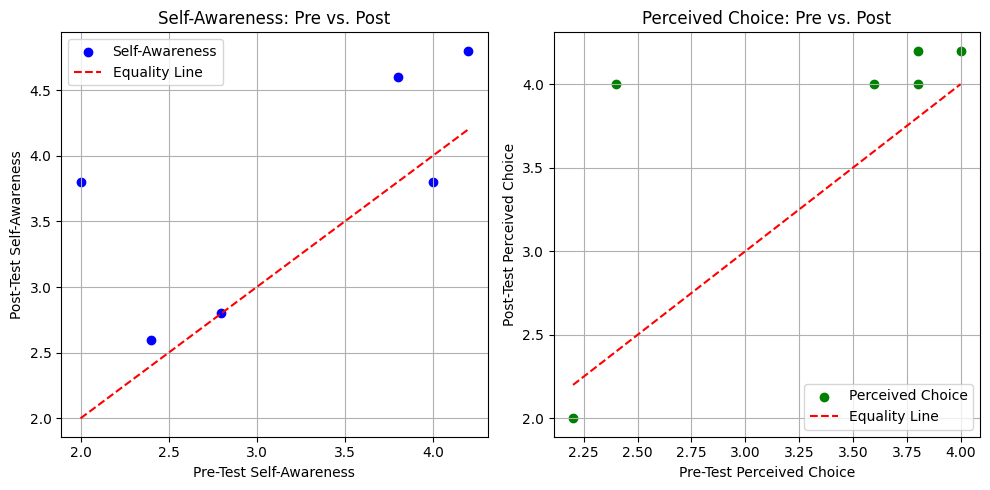

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot for Self-Awareness
plt.subplot(1, 2, 1)
plt.scatter(data['Pre_Awareness_of_self'], data['Post_Awareness_of_self'], color='blue', label='Self-Awareness')
plt.plot([min(data['Pre_Awareness_of_self']), max(data['Pre_Awareness_of_self'])], 
         [min(data['Pre_Awareness_of_self']), max(data['Pre_Awareness_of_self'])], 'r--', label='Equality Line')
plt.xlabel('Pre-Test Self-Awareness')
plt.ylabel('Post-Test Self-Awareness')
plt.title('Self-Awareness: Pre vs. Post')
plt.legend()
plt.grid(True)

# Plot for Perceived Choice
plt.subplot(1, 2, 2)
plt.scatter(data['Pre_perceived_Choice'], data['Post_perceived_Choice'], color='green', label='Perceived Choice')
plt.plot([min(data['Pre_perceived_Choice']), max(data['Pre_perceived_Choice'])], 
         [min(data['Pre_perceived_Choice']), max(data['Pre_perceived_Choice'])], 'r--', label='Equality Line')
plt.xlabel('Pre-Test Perceived Choice')
plt.ylabel('Post-Test Perceived Choice')
plt.title('Perceived Choice: Pre vs. Post')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


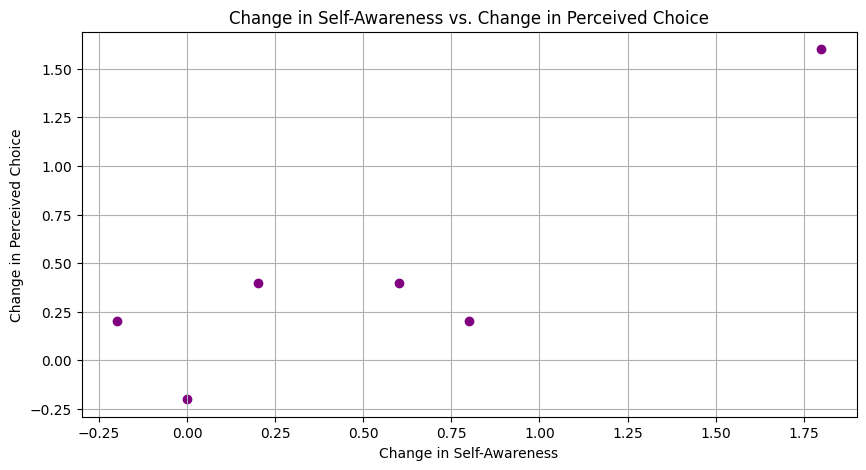

In [3]:
data['Change_Awareness'] = data['Post_Awareness_of_self'] - data['Pre_Awareness_of_self']
data['Change_Choice'] = data['Post_perceived_Choice'] - data['Pre_perceived_Choice']

plt.figure(figsize=(10, 5))
plt.scatter(data['Change_Awareness'], data['Change_Choice'], color='purple')
plt.xlabel('Change in Self-Awareness')
plt.ylabel('Change in Perceived Choice')
plt.title('Change in Self-Awareness vs. Change in Perceived Choice')
plt.grid(True)
plt.show()


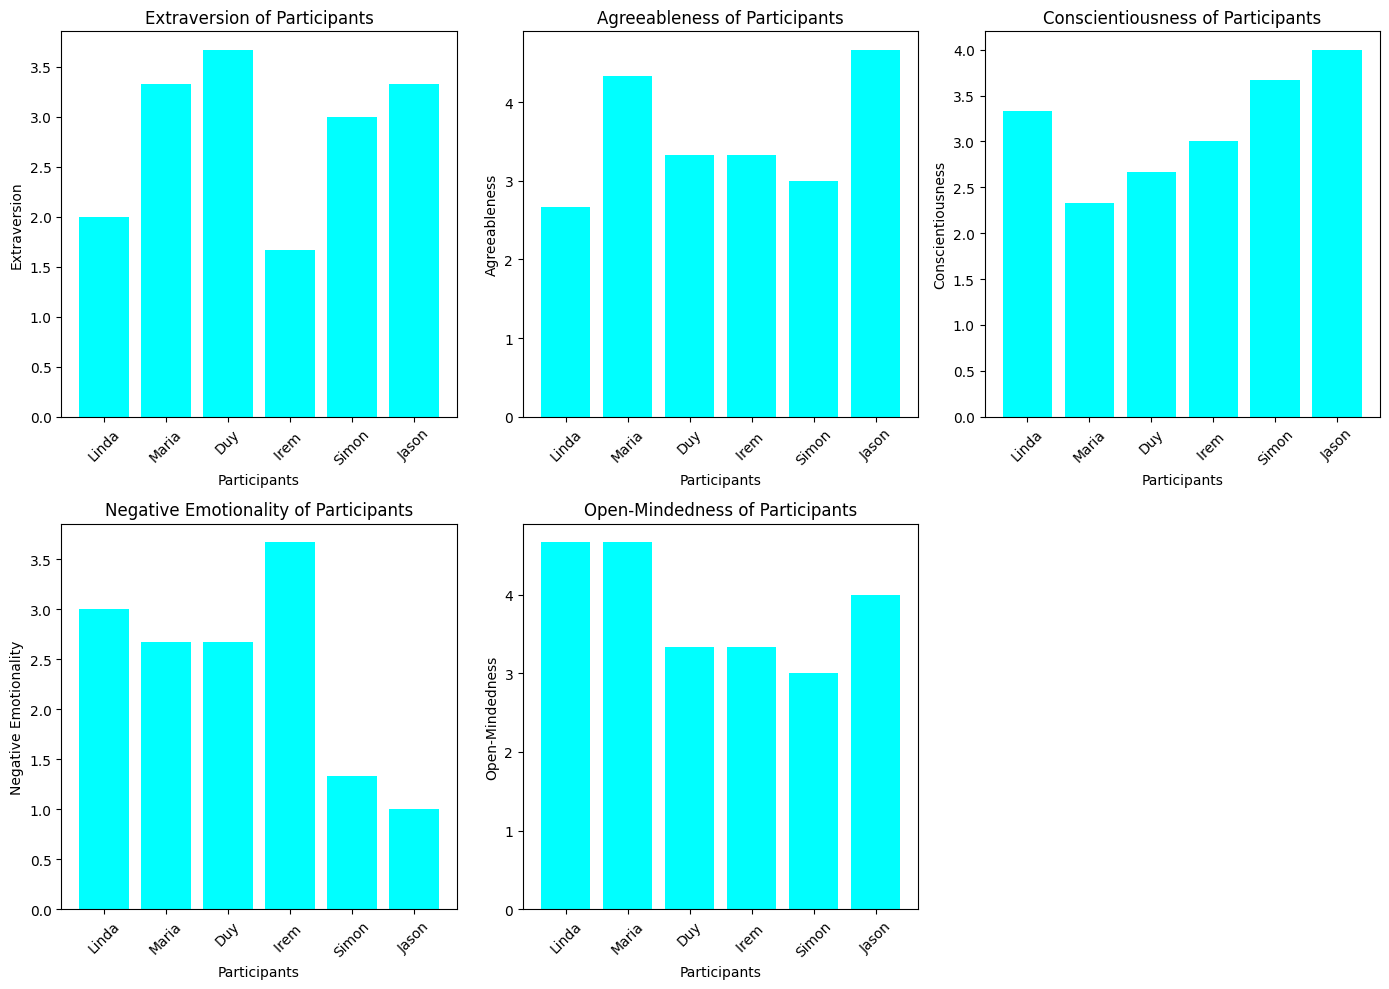

In [4]:
# Plot personality traits
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Negative Emotionality', 'Open-Mindedness']

plt.figure(figsize=(14, 10))

for i, trait in enumerate(traits):
    plt.subplot(2, 3, i+1)
    plt.bar(data['ParticipantID'], data[trait], color='cyan')
    plt.xlabel('Participants')
    plt.ylabel(trait)
    plt.title(f'{trait} of Participants')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import ttest_rel

# Paired t-tests
t_stat_awareness, p_val_awareness = ttest_rel(data['Pre_Awareness_of_self'], data['Post_Awareness_of_self'])
t_stat_choice, p_val_choice = ttest_rel(data['Pre_perceived_Choice'], data['Post_perceived_Choice'])

print(f'Self-Awareness: t-statistic = {t_stat_awareness}, p-value = {p_val_awareness}')
print(f'Perceived Choice: t-statistic = {t_stat_choice}, p-value = {p_val_choice}')


Self-Awareness: t-statistic = -1.8070158058105024, p-value = 0.1305729770769558
Perceived Choice: t-statistic = -1.7341042176646768, p-value = 0.1434307064632139


In [6]:
from scipy.stats import ttest_rel
import pandas as pd

# Example data
data = {
    'Pre_Awareness_of_self': [2, 2.4, 4, 2.8, 3.8, 4.2],
    'Post_Awareness_of_self': [3.8, 2.6, 3.8, 2.8, 4.6, 4.8]
}

df = pd.DataFrame(data)

# Perform paired t-test
t_stat_awareness, p_val_awareness = ttest_rel(df['Pre_Awareness_of_self'], df['Post_Awareness_of_self'])

print(f'T-statistic: {t_stat_awareness}')
print(f'P-value: {p_val_awareness}')


T-statistic: -1.8070158058105024
P-value: 0.1305729770769558
